In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt

In [41]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#set the location of the directory with data
directory = '/home/shenbaga/data-files/House_Prices/'

In [4]:
train = pd.read_csv(directory + 'train.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# clearly there are a lot of columns with missing values

In [7]:
train['MiscFeature'].isnull().sum()

1406

In [8]:
missing_values_count_df = pd.DataFrame(columns=('col_name','col_dtype','nbr_NaNs'))
missing_values_count_df

,col_name,col_dtype,nbr_NaNs


In [9]:
#create a new df with the count of # nulls
i = 0
for x in train.columns:
    missing_values_count_df.loc[i] = [x, train[x].dtype, train[x].isnull().sum()]
    i = i + 1

In [10]:
missing_values_count_df

,col_name,col_dtype,nbr_NaNs
0,Id,int64,0.0
1,MSSubClass,int64,0.0
2,MSZoning,object,0.0
3,LotFrontage,float64,259.0
4,LotArea,int64,0.0
5,Street,object,0.0
6,Alley,object,1369.0
7,LotShape,object,0.0
8,LandContour,object,0.0
9,Utilities,object,0.0


In [11]:
#get a list of cols that have NaNs
missing_cols = missing_values_count_df['col_name'][missing_values_count_df['nbr_NaNs'] != 0]

In [12]:
type(missing_cols)

pandas.core.series.Series

In [13]:
missing_cols_list = missing_cols.tolist()

In [14]:
type(missing_cols_list)

list

In [15]:
missing_cols_list[1], len(missing_cols_list)

('Alley', 19)

In [16]:
missing_cols_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

# From above, we have the list of columns that have missing values

In [17]:
missing_values_count_df[missing_values_count_df['nbr_NaNs']!=0].sort_values(by = 'nbr_NaNs',ascending=False)

,col_name,col_dtype,nbr_NaNs
72,PoolQC,object,1453.0
74,MiscFeature,object,1406.0
6,Alley,object,1369.0
73,Fence,object,1179.0
57,FireplaceQu,object,690.0
3,LotFrontage,float64,259.0
58,GarageType,object,81.0
59,GarageYrBlt,float64,81.0
60,GarageFinish,object,81.0
63,GarageQual,object,81.0


In [18]:
#create a list with the names of cols that are not going to be useful for predictions
cols_to_be_removed_list = ['PoolQC','MiscFeature','Alley','Fence']

In [19]:
#create a copy of the train and start filling NaNs one by one (column)
train_copy = train.copy()

In [24]:
#data.groupby(['col1', 'col2'])['col3'].mean()
train_copy.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [25]:
train_copy.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [26]:
train_copy[['Electrical']].head()

,Electrical
0,SBrkr
1,SBrkr
2,SBrkr
3,SBrkr
4,SBrkr


# fill the NaN in Electrical column with the Mode value - 'SBrkr'

In [27]:
train_copy.Electrical.fillna('SBrkr')

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
5       SBrkr
6       SBrkr
7       SBrkr
8       FuseF
9       SBrkr
10      SBrkr
11      SBrkr
12      SBrkr
13      SBrkr
14      SBrkr
15      FuseA
16      SBrkr
17      SBrkr
18      SBrkr
19      SBrkr
20      SBrkr
21      FuseF
22      SBrkr
23      SBrkr
24      SBrkr
25      SBrkr
26      SBrkr
27      SBrkr
28      SBrkr
29      SBrkr
        ...  
1430    SBrkr
1431    SBrkr
1432    SBrkr
1433    SBrkr
1434    SBrkr
1435    SBrkr
1436    SBrkr
1437    SBrkr
1438    FuseA
1439    SBrkr
1440    SBrkr
1441    SBrkr
1442    SBrkr
1443    FuseF
1444    SBrkr
1445    SBrkr
1446    SBrkr
1447    SBrkr
1448    SBrkr
1449    SBrkr
1450    SBrkr
1451    SBrkr
1452    SBrkr
1453    SBrkr
1454    SBrkr
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, dtype: object

In [28]:
train_copy.Electrical.isnull().sum()

1

In [29]:
train_copy.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [30]:
train_copy['Electrical'].fillna('SBrkr', inplace=True)

In [31]:
train_copy.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

# Similar treatment for the column - MasVnrType

In [32]:
train_copy.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

# Even though the NaNs are very small, 'None' is the majority, rendering this column not so useful. So we add it to the not used col list

In [33]:
cols_to_be_removed_list.append('MasVnrType')

In [34]:
cols_to_be_removed_list

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType']

# On to the next column to be treated - MasVnrArea. Note that this is a float col

In [38]:
a = train_copy[['MasVnrArea']]

In [39]:
a.describe()

,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


In [40]:
train_copy.MasVnrArea.isnull().sum()

8

In [46]:
d = train_copy[['MasVnrArea']].dropna(axis=0)

In [48]:
d.values

array([[ 196.],
       [   0.],
       [ 162.],
       ..., 
       [   0.],
       [   0.],
       [   0.]])

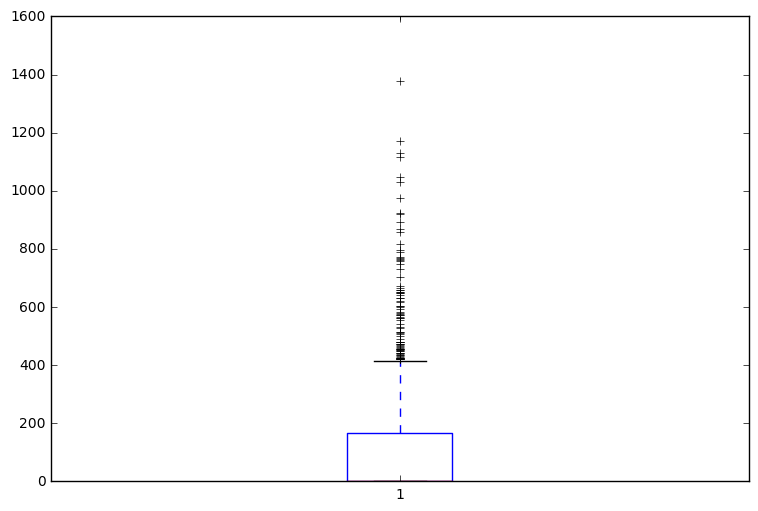

In [49]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(d.values)

plt.show()

# the box plot and the describe() ouput earlier shows that this field may not have a lot of useful info. the median is 0.000!

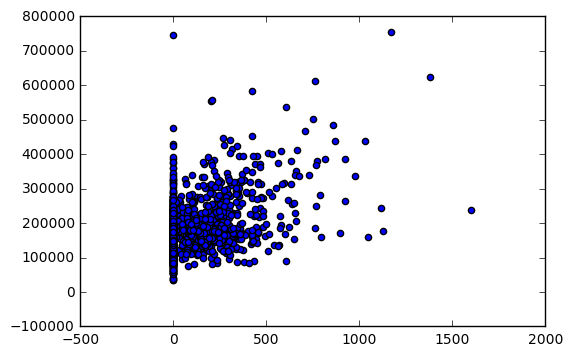

In [50]:
plt.scatter(x=train_copy['MasVnrArea'], y=train_copy['SalePrice'])

# again, it is clear that there are a lot of 0 for the Area field

In [52]:
len(train_copy[train_copy['MasVnrArea'] == 0])

861

# 861 out of 1460 to be precise. so this again is not useful

In [53]:
cols_to_be_removed_list.append('MasVnrArea')

# next column to focus is BsmtQual

In [54]:
train_copy.BsmtQual.isnull().sum()

37

In [56]:
train_copy.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [55]:
train_copy.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

FillNA in BsmtQuak with the mode value - TA

In [57]:
train_copy['BsmtQual'].fillna('TA', inplace=True)

In [58]:
train_copy.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)